In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


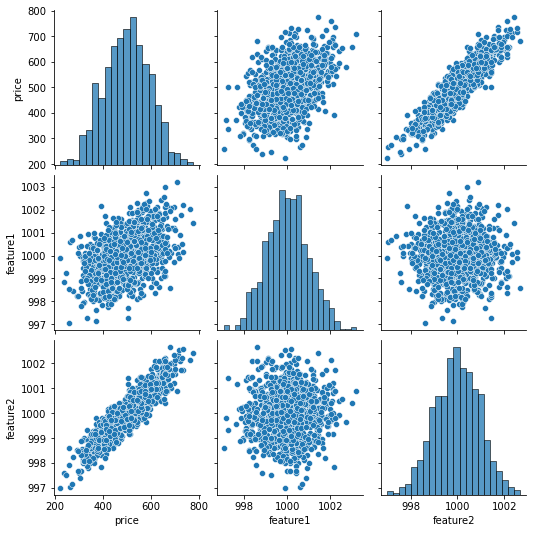

In [6]:
sns.pairplot(df)

In [7]:
#fake data so we can see that feature2 correlates strongly

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[['feature1','feature2']].values #.values makes it a NP array for TF
y = df['price'].values
#NP arrays


In [10]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)

In [24]:
print(X_train[:5])
print(X_train.min())
print(X_train.max())
#Data is properly scaled

[[0.74046017 0.32583248]
 [0.43166001 0.2555088 ]
 [0.18468554 0.70500664]
 [0.52955895 0.93551377]
 [0.52907398 0.39249753]]
0.0
1.0


In [20]:
X_test = scaler.transform(X_test)

In [25]:
#Time to create NN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [28]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor

In [29]:
# model = Sequential([Dense(4,activation='relu'),
#                     Dense(2,activation='relu'),
#                     Dense(1)])

In [36]:
#more modular additions to model layers same as above
model = Sequential()

#layers
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
#output layer - single neuron to produce price prediction
model.add(Dense(1))
# add loss function to model
model.compile(optimizer='rmsprop',loss='mse')

In [37]:
#extremely basic fit
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 255709.5584
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 253119.7887
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 253999.5353
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 262840.8560
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 261281.1855
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256296.2629
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 261801.3037
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 258386.7004
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 257640.6705
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 255859.2432
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 252290.8818
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

Epoch 192/250
22/22 [==============================] - 0s 2ms/step - loss: 42.2872
Epoch 193/250
22/22 [==============================] - 0s 2ms/step - loss: 38.9124
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 37.8565
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 35.4542
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 35.2846
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 31.9171
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 30.8448
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 30.8200
Epoch 200/250
22/22 [==============================] - 0s 3ms/step - loss: 28.5439
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 28.7529
Epoch 202/250
22/22 [==============================] - 0s 3ms/step - loss: 26.5496
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 28.3279
Epoc

In [39]:
loss_df = pd.DataFrame(model.history.history)

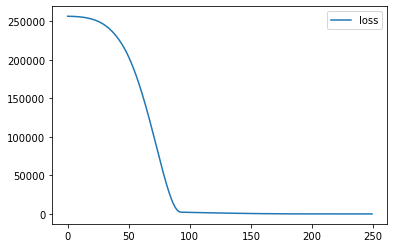

In [40]:
loss_df.plot()

In [42]:
#Evaluating prediction of test data
model.evaluate(X_test,y_test,verbose=0)

27.79046630859375

In [43]:
model.evaluate(X_train,y_train,verbose=0)

25.265155792236328

In [44]:
test_predictions = model.predict(X_test)

In [45]:
test_predictions

array([[406.55127],
       [625.46014],
       [593.9669 ],
       [573.97034],
       [367.7202 ],
       [580.9598 ],
       [516.6058 ],
       [460.54794],
       [550.9207 ],
       [448.92838],
       [613.672  ],
       [550.6819 ],
       [420.40012],
       [410.13263],
       [653.28906],
       [438.66922],
       [510.05948],
       [661.92706],
       [664.6071 ],
       [567.2995 ],
       [335.25357],
       [446.2124 ],
       [383.7038 ],
       [379.9384 ],
       [568.3411 ],
       [612.45233],
       [534.0303 ],
       [429.19403],
       [657.43713],
       [415.38593],
       [444.02658],
       [486.631  ],
       [439.7793 ],
       [683.92664],
       [426.10526],
       [418.96805],
       [503.52502],
       [552.1791 ],
       [511.27905],
       [396.54996],
       [620.5063 ],
       [417.93646],
       [606.32025],
       [447.37378],
       [503.54227],
       [583.5553 ],
       [671.0924 ],
       [491.93784],
       [319.5976 ],
       [486.9273 ],


In [46]:
test_prediction = pd.Series(test_predictions.reshape(300,))

In [47]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [49]:
pred_df = pd.concat([pred_df,test_prediction],axis=1)

In [50]:
pred_df.columns = ['Test True Y','Model Predictions']

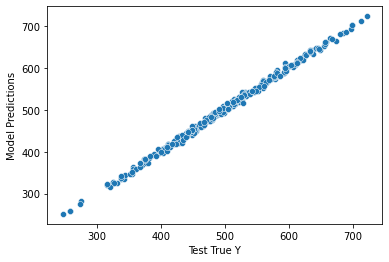

In [52]:
sns.scatterplot(data=pred_df,x='Test True Y',y='Model Predictions')

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [54]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.279917834586663

In [56]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [69]:
#practically same as our loss
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**.5 #**.5 root mean squared error

5.271666516441955

In [ ]:
#Predicting on a new input!!!!!!!

In [59]:
new_gem = [[998,1000]]

In [61]:
new_gem = scaler.transform(new_gem)

In [68]:
model.predict(new_gem)

array([[420.95346]], dtype=float32)

In [ ]:
#Saving a model to use later!!!!!!!!!

In [63]:
from tensorflow.keras.models import load_model

In [64]:
model.save('my_gem_model.h5')

In [65]:
later_model = load_model('my_gem_model.h5')

In [66]:
later_model.predict(new_gem)

array([[420.95346]], dtype=float32)